# 1. Exploratory Data Analysis on customer transaction data

This analysis is done as a part of the Data@ANZ Virtual internship. The data set contains  3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions. The aim is to explore the data and gather some insights.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

import matplotlib.pyplot as plt
%matplotlib inline

import datetime

In [2]:
#!pip install openpyxl
data = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [4]:
data.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

In [5]:
df = data[['status','account', 'long_lat','txn_description','first_name','date','gender','age','extraction','amount','customer_id','movement', 'merchant_id', 'merchant_suburb','merchant_long_lat']]
df.head()

,status,account,long_lat,txn_description,first_name,date,gender,age,extraction,amount,customer_id,movement,merchant_id,merchant_suburb,merchant_long_lat
0,authorized,ACC-1598451071,153.41 -27.95,POS,Diana,2018-08-01,F,26,2018-08-01T01:01:15.000+0000,16.25,CUS-2487424745,debit,81c48296-73be-44a7-befa-d053f48ce7cd,Ashmore,153.38 -27.99
1,authorized,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,2018-08-01,F,26,2018-08-01T01:13:45.000+0000,14.19,CUS-2487424745,debit,830a451c-316e-4a6a-bf25-e37caedca49e,Sydney,151.21 -33.87
2,authorized,ACC-1222300524,151.23 -33.94,POS,Michael,2018-08-01,M,38,2018-08-01T01:26:15.000+0000,6.42,CUS-2142601169,debit,835c231d-8cdf-4e96-859d-e9d571760cf0,Sydney,151.21 -33.87
3,authorized,ACC-1037050564,153.10 -27.66,SALES-POS,Rhonda,2018-08-01,F,40,2018-08-01T01:38:45.000+0000,40.90,CUS-1614226872,debit,48514682-c78a-4a88-b0da-2d6302e64673,Buderim,153.05 -26.68
4,authorized,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,2018-08-01,F,26,2018-08-01T01:51:15.000+0000,3.25,CUS-2487424745,debit,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Mermaid Beach,153.44 -28.06


## Data analysis

## Analysing the acount credits

In [6]:
df_credit = df.loc[df['movement']=='credit'].groupby(['customer_id','txn_description']).agg({'amount': 'mean','first_name':'first','age': 'first','gender':'first'}).reset_index()
print(df_credit.gender.value_counts())
print(df_credit.txn_description.value_counts())

M    56
F    44
Name: gender, dtype: int64
PAY/SALARY    100
Name: txn_description, dtype: int64


In [7]:
df_credit.describe()


,amount,age
count,100.00000,100.000000
mean,2297.27390,31.770000
std,1397.78397,11.544254
min,576.00000,18.000000
25%,1153.31000,22.000000
50%,1949.43000,29.500000
75%,2886.72500,39.250000
max,8835.98000,78.000000


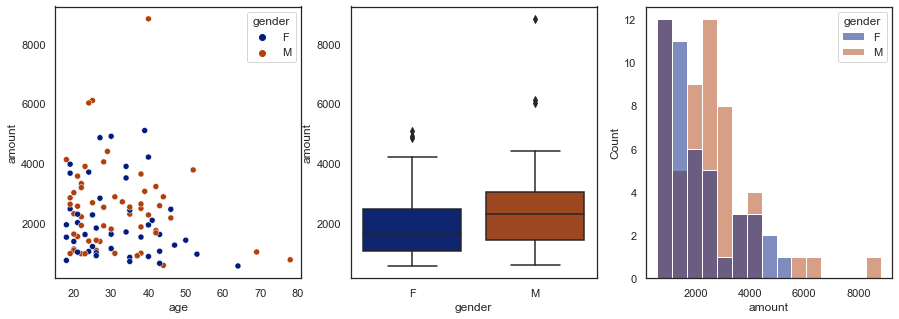

In [8]:
fig,ax = plt.subplots(1,3, figsize=(15,5))
sns.scatterplot(data=df_credit, x='age',y='amount',hue='gender', ax=ax[0], )
sns.boxplot(data=df_credit, x='gender',y='amount', ax=ax[1])
sns.histplot(data = df_credit, x='amount', bins =15, ax=ax[2],hue='gender')

Considering the given accounts, there are 56 men and 44 women. The youngest account holder is 18 years of age, while the oldest is 78 years. 

Considering the credits to the accounts, it can be seen that all the credits are of type pay/salary, and by checking the pay distribution among the customers, The average pay is around `$2297`per month. By checking the figure, it can be seen that the average pay for men is slightly higher compared to the women. However, this value is effected by extreme outliers. Additionally, the data is positively skewed, meaning the median pay is less than the average, and is `$1949`. 

## Analysing customer expenses

In [9]:
df_debit = df.loc[df['movement']=='debit']
df_debit['extraction'] = pd.to_datetime(df_debit['extraction']).dt.tz_localize(None)

df_debit['datetime'] = df_debit['extraction'].dt.strftime('%d/%m/%Y %H:%M')
df_debit['date'] = df_debit['extraction'].dt.date
df_debit['hour'] = df_debit['extraction'].dt.hour
df_debit['dayofweek'] = df_debit['extraction'].dt.dayofweek

print(df_debit.txn_description.value_counts())
print(df_debit['extraction'].dtypes)
print(df_debit['datetime'].dtypes)
print(df_debit['date'].dtypes)
print(df_debit['dayofweek'].dtypes)

df_debit.head()

SALES-POS     3934
POS           3783
PAYMENT       2600
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64
datetime64[ns]
object
object
int64


d:\miniconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\miniconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
d:\miniconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,status,account,long_lat,txn_description,first_name,date,gender,age,extraction,amount,customer_id,movement,merchant_id,merchant_suburb,merchant_long_lat,datetime,hour,dayofweek
0,authorized,ACC-1598451071,153.41 -27.95,POS,Diana,2018-08-01,F,26,2018-08-01 01:01:15,16.25,CUS-2487424745,debit,81c48296-73be-44a7-befa-d053f48ce7cd,Ashmore,153.38 -27.99,01/08/2018 01:01,1,2
1,authorized,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,2018-08-01,F,26,2018-08-01 01:13:45,14.19,CUS-2487424745,debit,830a451c-316e-4a6a-bf25-e37caedca49e,Sydney,151.21 -33.87,01/08/2018 01:13,1,2
2,authorized,ACC-1222300524,151.23 -33.94,POS,Michael,2018-08-01,M,38,2018-08-01 01:26:15,6.42,CUS-2142601169,debit,835c231d-8cdf-4e96-859d-e9d571760cf0,Sydney,151.21 -33.87,01/08/2018 01:26,1,2
3,authorized,ACC-1037050564,153.10 -27.66,SALES-POS,Rhonda,2018-08-01,F,40,2018-08-01 01:38:45,40.90,CUS-1614226872,debit,48514682-c78a-4a88-b0da-2d6302e64673,Buderim,153.05 -26.68,01/08/2018 01:38,1,2
4,authorized,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,2018-08-01,F,26,2018-08-01 01:51:15,3.25,CUS-2487424745,debit,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Mermaid Beach,153.44 -28.06,01/08/2018 01:51,1,2


### Analyze expense by date, day of week and time

In [10]:
df_debit_date = df_debit.groupby(['date']).agg({'amount':['sum', 'mean','max'], 'account':'count','dayofweek':'first'})
df_debit_date.columns = ["_".join ((i,k)) for i,k in df_debit_date.columns]
df_debit_date.reset_index(inplace=True)
df_debit_date

,date,amount_sum,amount_mean,amount_max,account_count,dayofweek_first
0,2018-08-01,5546.44,44.729355,937.73,124,2
1,2018-08-02,7558.09,53.225986,1692.56,142,3
2,2018-08-03,8035.90,56.590845,1233.80,142,4
3,2018-08-04,6296.05,53.356356,1909.04,118,5
4,2018-08-05,4426.50,44.265000,546.94,100,6
...,...,...,...,...,...,...
86,2018-10-27,6971.58,50.155252,1377.00,139,5
87,2018-10-28,8438.11,59.007762,1771.00,143,6
88,2018-10-29,2519.18,29.292791,113.67,86,0
89,2018-10-30,2089.32,27.134026,111.30,77,1


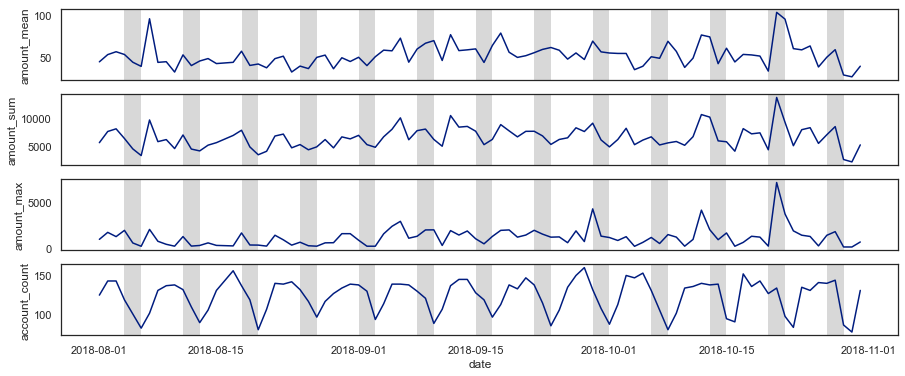

In [11]:
fig,ax = plt.subplots(4,1, figsize = (15,6),sharex=True)
weekend = df_debit_date.loc[df_debit_date['dayofweek_first'] > 4].date.tolist()
for i in weekend:
    ax[0].axvspan(i,  (i + datetime.timedelta(days=1)) ,facecolor='gray', edgecolor='none', alpha=0.3 )
    ax[1].axvspan(i,  (i + datetime.timedelta(days=1)) ,facecolor='gray', edgecolor='none', alpha=0.3 )
    ax[2].axvspan(i,  (i + datetime.timedelta(days=1)) ,facecolor='gray', edgecolor='none', alpha=0.3 )
    ax[3].axvspan(i,  (i + datetime.timedelta(days=1)) ,facecolor='gray', edgecolor='none', alpha=0.3 )


sns.lineplot(data = df_debit_date, x='date', y= 'amount_mean', ax=ax[0])
sns.lineplot(data = df_debit_date, x='date', y= 'amount_sum', ax=ax[1])
sns.lineplot(data = df_debit_date, x='date', y= 'amount_max', ax=ax[2])
sns.lineplot(data = df_debit_date, x='date', y= 'account_count', ax=ax[3])



From the above figure, it can be seen than the customer spending habits are lower on Monday, whereas it increments as the week goes by. 

Considering the total spenditure, it has slightly incremented througout the months. On average there are 123 customer transactions per day and on average, the amount spend per transaction is around `$53`. 

In [12]:
df_debit_date.groupby('dayofweek_first').mean().describe()

,amount_sum,amount_mean,amount_max,account_count
count,7.000000,7.000000,7.000000,7.000000
mean,6453.087687,52.715594,1180.727938,122.671376
std,825.240856,3.035222,188.143312,20.480026
min,5031.762308,47.693445,954.865385,88.692308
25%,6015.977692,51.203617,1048.650412,110.653846
50%,6782.817143,52.944196,1126.700000,131.461538
75%,7009.316154,54.832055,1297.826987,136.619048
max,7306.446667,56.300174,1490.575385,144.000000


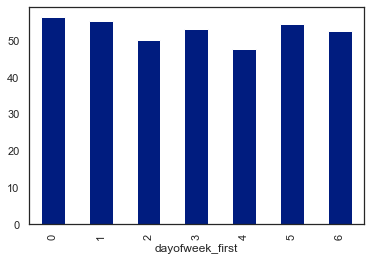

In [13]:
df_debit_date.groupby('dayofweek_first').mean()['amount_mean'].plot(kind='bar')

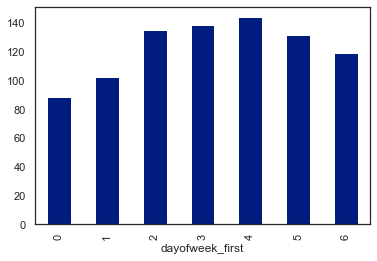

In [14]:
df_debit_date.groupby('dayofweek_first').mean()['account_count'].plot(kind='bar')

In [15]:
df_debit_hour = df_debit.groupby(['hour']).agg({'amount':['sum', 'mean'], 'account':'count'})
df_debit_hour.columns = ["_".join ((i,k)) for i,k in df_debit_hour.columns]
df_debit_hour.reset_index(inplace=True)
df_debit_hour.describe()

,hour,amount_sum,amount_mean,account_count
count,24.000000,24.000000,24.000000,24.00000
mean,11.500000,24446.139583,54.916826,465.00000
std,7.071068,10246.612388,11.913881,237.93185
min,0.000000,3053.690000,28.274907,108.00000
25%,5.750000,18358.272500,47.885051,261.75000
50%,11.500000,22896.405000,53.189269,426.00000
75%,17.250000,32604.425000,60.619701,602.25000
max,23.000000,46785.050000,84.725918,1106.00000


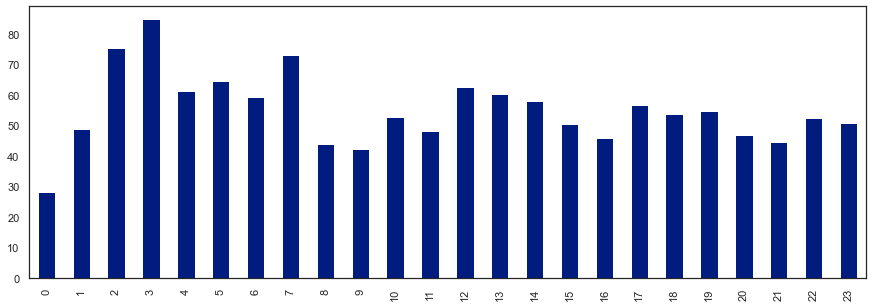

In [16]:
df_debit_hour['amount_mean'].plot(kind='bar', figsize=(15,5))

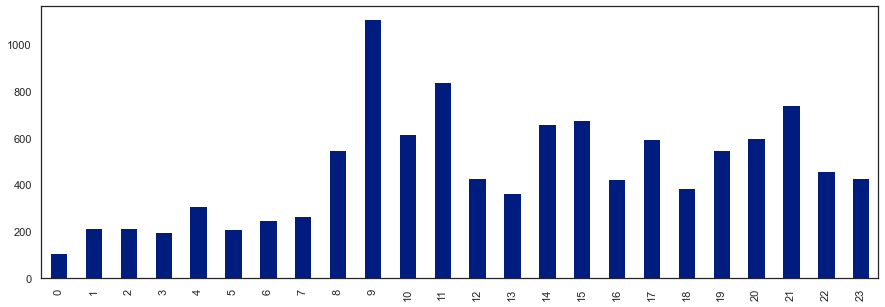

In [17]:
df_debit_hour['account_count'].plot(kind='bar',figsize=(15,5))

It can be seen that more transactions are done at day time, where the highest number of transactions occur at 9.00 am.
However, the average amount spent on transactions at night is higher

### spending habits by gender

In [18]:
df_debit_gender = df_debit.groupby(['date','gender']).agg({'amount':'mean', 'account':'count'}).reset_index()
df_debit_gender

,date,gender,amount,account
0,2018-08-01,F,53.278154,65
1,2018-08-01,M,35.311186,59
2,2018-08-02,F,39.694848,66
3,2018-08-02,M,64.976711,76
4,2018-08-03,F,51.010282,71
...,...,...,...,...
177,2018-10-29,M,28.483333,39
178,2018-10-30,F,27.606842,38
179,2018-10-30,M,26.673333,39
180,2018-10-31,F,42.748710,62


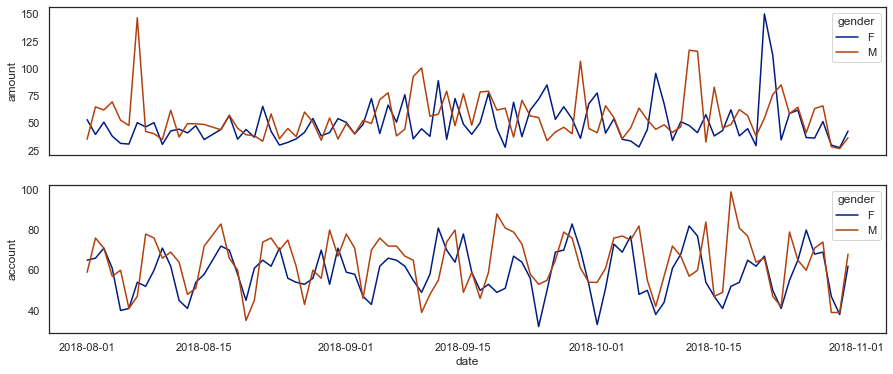

In [19]:
fig,ax = plt.subplots(2,1, figsize = (15,6), sharex=True)

sns.lineplot(data = df_debit_gender, x='date', y= 'amount', ax=ax[0],hue='gender')
sns.lineplot(data = df_debit_gender, x='date', y ='account', ax=ax[1],hue='gender')

### spending habits by age

In [20]:
df_debit_age = df_debit.groupby(['age','gender']).agg({'amount':['mean','sum'], 'account':'count'})
df_debit_age.columns = ["_".join ((i,k)) for i,k in df_debit_age.columns]
df_debit_age.reset_index(inplace=True)

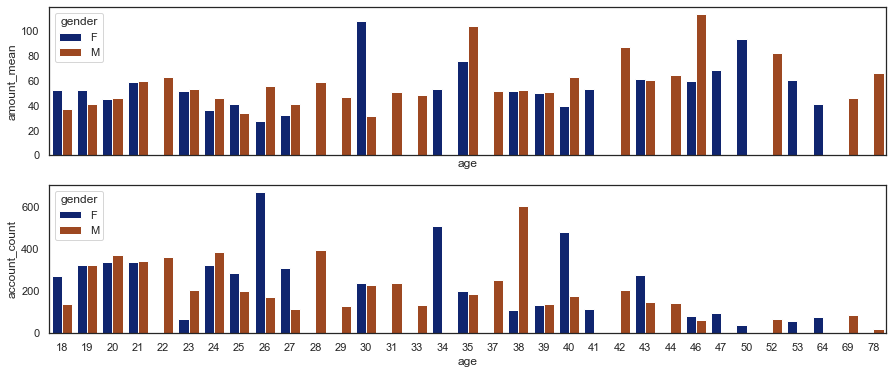

In [21]:
fig,ax = plt.subplots(2,1, figsize = (15,6), sharex=True)

sns.barplot(data = df_debit_age, x='age', y='amount_mean', ax=ax[0], hue='gender' )
sns.barplot(data = df_debit_age, x='age', y='account_count', ax=ax[1], hue='gender')


According to these two figures, the amount of transactions done by younger generation is comparatively higher than the eldearly, whereas the amount spend on average per transaction by the elderly is higher. Few instances can be observed where younger women around the ages of 26, 34  and men at the age of 38 making more transactions in comparison with men and women on other age groups. 

### Analysis by location

In [22]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import ipywidgets

In [23]:
df_loc = df.groupby(['account','movement']).agg({'amount':'mean','gender':'first','age':'first','long_lat':'first'}).reset_index()
df_loc.head(200)

,account,movement,amount,gender,age,long_lat
0,ACC-1037050564,credit,892.090000,F,40,153.10 -27.66
1,ACC-1037050564,debit,31.257195,F,40,153.10 -27.66
2,ACC-1056639002,credit,3195.010000,M,22,145.03 -37.91
3,ACC-1056639002,debit,45.394125,M,22,145.03 -37.91
4,ACC-1199531521,credit,3785.780000,M,52,116.02 -31.87
...,...,...,...,...,...,...
195,ACC-958000567,debit,71.646587,F,34,130.90 -12.37
196,ACC-964839203,credit,1560.200000,M,21,146.92 -36.07
197,ACC-964839203,debit,56.684381,M,21,146.92 -36.07
198,ACC-966140392,credit,2572.910000,M,21,147.08 -37.97


Since there is an issue with the coordinates of an account, by checking the account number of the account with faulty coordinates with accounts with similar digits, the location can be assumed to be in the same area

In [24]:
df.sort_values(by = 'long_lat').tail()
data.loc[data['long_lat'] =='255.00 -573.00']['account'].value_counts()

ACC-2901672282    123
Name: account, dtype: int64

In [25]:
data.loc[data['account'].str.contains('^ACC-29')]['account'].value_counts()
data.loc[data['account'].str.contains('^ACC-29')]['long_lat'].value_counts()

255.00 -573.00    123
144.96 -37.76     102
144.89 -37.69      78
145.18 -37.90      44
Name: long_lat, dtype: int64

In [26]:
coords = np.array([(lambda x: x.split(' ')) (x) for x in  data.loc[data['account'].str.contains('^ACC-29')]['long_lat'].value_counts().index.tolist()[1:]]).astype(np.float)
newcoords = np.mean(coords,axis=0)
data.loc[data['account']=='ACC-2901672282','long_lat'] = '{} {}'.format(round(newcoords[0],2),round(newcoords[1],2))
df.loc[df['account']=='ACC-2901672282','long_lat'] = '{} {}'.format(round(newcoords[0],2),round(newcoords[1],2))
df_loc.loc[df_loc['account']=='ACC-2901672282','long_lat'] = '{} {}'.format(round(newcoords[0],2),round(newcoords[1],2))

d:\miniconda3\envs\tf2\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [27]:
mp = folium.Map(location=[-37.81,144.96], zoom_start=9.5)
custlist = df_loc.account.unique().tolist()


loc =[]
for i in custlist:
    val = df_loc.loc[(df_loc['account']==i) & (df_loc['movement'] =='credit')]['amount'].item()
    latlng = df_loc.loc[(df_loc['account']==i) & (df_loc['movement'] =='credit')]['long_lat'].item()
    loc.append([latlng.split(' ')[1], latlng.split(' ')[0], val])
    folium.Marker([latlng.split(' ')[1], latlng.split(' ')[0]],opacity = 0).add_to(mp)
    
HeatMap(loc).add_to(mp)
folium.LayerControl().add_to(mp)
mp

In [28]:
mp1 = folium.Map(location=[-37.81,144.96], zoom_start=9.5)
custlist = df_loc.account.unique().tolist()


loc =[]
for i in custlist:
    val = df_loc.loc[(df_loc['account']==i) & (df_loc['movement'] =='debit')]['amount'].item()
    latlng = df_loc.loc[(df_loc['account']==i) & (df_loc['movement'] =='debit')]['long_lat'].item()
    loc.append([latlng.split(' ')[1], latlng.split(' ')[0], val])
    folium.Marker([latlng.split(' ')[1], latlng.split(' ')[0]],opacity = 0).add_to(mp1)
    
HeatMap(loc).add_to(mp1)
folium.LayerControl().add_to(mp1)
mp1

### Analyze the customer transactions based on Merchant Locations

In [29]:
df_merch = df.dropna(axis=0)
df_merch.reset_index(drop = True, inplace=True)
#df_merch.merchant_long_lat.sort_values() # check to see if any issues
df_merch.head()

,status,account,long_lat,txn_description,first_name,date,gender,age,extraction,amount,customer_id,movement,merchant_id,merchant_suburb,merchant_long_lat
0,authorized,ACC-1598451071,153.41 -27.95,POS,Diana,2018-08-01,F,26,2018-08-01T01:01:15.000+0000,16.25,CUS-2487424745,debit,81c48296-73be-44a7-befa-d053f48ce7cd,Ashmore,153.38 -27.99
1,authorized,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,2018-08-01,F,26,2018-08-01T01:13:45.000+0000,14.19,CUS-2487424745,debit,830a451c-316e-4a6a-bf25-e37caedca49e,Sydney,151.21 -33.87
2,authorized,ACC-1222300524,151.23 -33.94,POS,Michael,2018-08-01,M,38,2018-08-01T01:26:15.000+0000,6.42,CUS-2142601169,debit,835c231d-8cdf-4e96-859d-e9d571760cf0,Sydney,151.21 -33.87
3,authorized,ACC-1037050564,153.10 -27.66,SALES-POS,Rhonda,2018-08-01,F,40,2018-08-01T01:38:45.000+0000,40.90,CUS-1614226872,debit,48514682-c78a-4a88-b0da-2d6302e64673,Buderim,153.05 -26.68
4,authorized,ACC-1598451071,153.41 -27.95,SALES-POS,Diana,2018-08-01,F,26,2018-08-01T01:51:15.000+0000,3.25,CUS-2487424745,debit,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Mermaid Beach,153.44 -28.06


In [30]:
from math import sin,cos,asin,sqrt, radians, pi

def calDistance(cord1,cord2):
    '''
    this uses the haversine formula since calculating distance between lat,lng coordinates. 
    '''
    lat1 = float(cord1.split(' ')[1])
    lat2 = float(cord2.split(' ')[1])
    lng1 = float(cord1.split(' ')[0])
    lng2 = float(cord2.split(' ')[0])
    
    if((lat2 > -10.0) | (lat2 < -44.0) | (lng2 < 113.0) | (lng2 > 154.0)):
        return pd.NA
    else:
        lat2 = lat2*pi/180
        lng2 = lng2*pi/180
        lat1 = lat1*pi/180
        lng1 = lng1*pi/180
        
        r=6371 # radius of earth in km
        dist= r*2*asin(sqrt(pow(sin((lat1-lat2)/2),2) + cos(lat1)* cos(lat2)*pow(sin((lng1-lng2)/2),2)))
        return round(dist,1)


In [31]:
for i in range(0,df_merch.shape[0]):
    dist = calDistance(df_merch.loc[i]['long_lat'], df_merch.loc[i]['merchant_long_lat'])
    df_merch.loc[i,'distance'] = dist
    
df_merch.info()    

d:\miniconda3\envs\tf2\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
d:\miniconda3\envs\tf2\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7717 entries, 0 to 7716
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             7717 non-null   object        
 1   account            7717 non-null   object        
 2   long_lat           7717 non-null   object        
 3   txn_description    7717 non-null   object        
 4   first_name         7717 non-null   object        
 5   date               7717 non-null   datetime64[ns]
 6   gender             7717 non-null   object        
 7   age                7717 non-null   int64         
 8   extraction         7717 non-null   object        
 9   amount             7717 non-null   float64       
 10  customer_id        7717 non-null   object        
 11  movement           7717 non-null   object        
 12  merchant_id        7717 non-null   object        
 13  merchant_suburb    7717 non-null   object        
 14  merchant

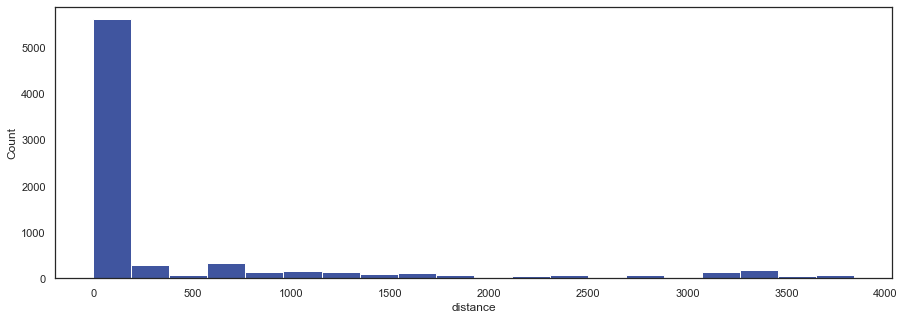

In [32]:
fig,ax = plt.subplots(1 ,figsize=(15,5))
sns.histplot(data = df_merch, x='distance', bins =20,  ax=ax)


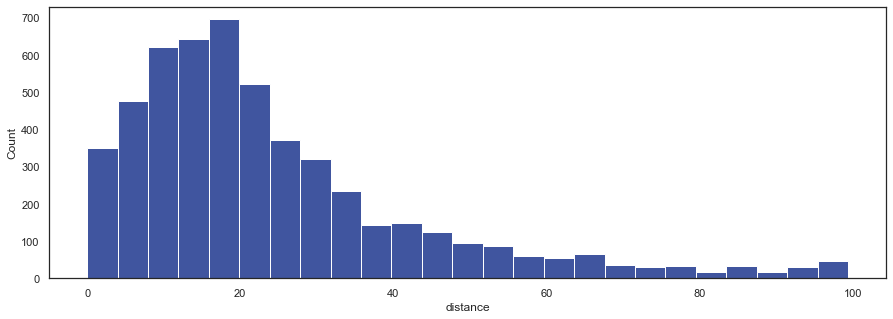

In [33]:
fig,ax = plt.subplots(1 ,figsize=(15,5))
sns.histplot(data = df_merch.loc[df_merch['distance']<100.00], x='distance', bins =25,  ax=ax)


Based on these results, the customers have made more trades with merchents that are within a 10-20 km range